In [1]:
# Importing required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NLP KRISH LIVE SESSION/train.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [3]:
df.drop(['id', 'author', 'text'],axis=1,inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)
df

,index,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1
...,...,...,...
20237,20795,Rapper T.I.: Trump a ’Poster Child For White S...,0
20238,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20239,20797,Macy’s Is Said to Receive Takeover Approach by...,0
20240,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df.drop('index',axis=1,inplace=True)
df

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
20237,Rapper T.I.: Trump a ’Poster Child For White S...,0
20238,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20239,Macy’s Is Said to Receive Takeover Approach by...,0
20240,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [7]:
df = df.iloc[0:1000,:]    # rows, # cols
df

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
995,Trump Poised to Lift Ban on C.I.A. ‘Black Site...,0
996,Tesla’s Musk Investigated Over SolarCity by Co...,1
997,5 Ridiculously Stupid Things Men Keep Doing Fo...,1
998,Press TV: Duff on UN Condemnations of “Moderat...,1


In [8]:
df['label'].value_counts()

0    510
1    490
Name: label, dtype: int64

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
X = df['title']
y = df['label']

In [12]:
# Dataset Preprocessing

import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
  review = re.sub('[^a-zA-Z]',' ', X[i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

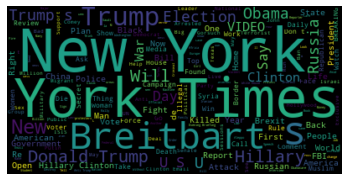

In [13]:
common_words=''
for i in X:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
lb=LabelEncoder()
values = lb.fit_transform(X)
values

array([379, 287, 943,   9, 440, 454, 486, 109, 270,  31, 566,  95, 672,
       882, 633, 421, 918,  77, 277, 170, 548, 524, 661, 504,  47, 562,
       255, 398,  73, 383, 169, 449, 353, 760, 106, 667, 632, 575, 216,
        92, 494,  20, 677, 155, 198, 434, 608, 976, 683, 594, 720, 250,
       736, 681, 803, 264, 179, 409, 521, 783, 401,  15, 505, 654, 873,
       463, 175, 583, 110, 387, 823, 249,  87, 611, 218, 550, 461,  28,
       314, 489, 865, 397, 180, 860, 503, 592, 834, 310,   5, 519, 436,
       894, 935, 135, 936, 773, 600, 518, 491, 752,  67, 362, 832,  59,
         4, 910, 380, 537, 506, 512, 749,  99, 712, 174, 744, 697,  39,
       649, 852, 938, 996, 746, 786, 275, 755, 177, 743, 582, 765, 400,
       236, 253, 278, 526, 784, 798, 452, 451, 339, 870, 831, 279,  10,
       641, 498, 309, 779, 735, 223, 795,  37, 292, 764, 778, 143, 929,
       304, 802, 546, 456,  32, 692, 748, 336, 753, 523, 638, 612, 890,
       850, 727, 725, 982, 812, 193, 751, 360, 962, 690, 613, 90

In [17]:
# Tokenizer ---> Word to vector

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)
X

array([[  0,   0,   0, ..., 338, 339,  28],
       [  0,   0,   0, ..., 114,  13,  12],
       [  0,   0,   0, ..., 102,  24, 341],
       ...,
       [  0,   0,   0, ..., 191,  11, 161],
       [  0,   0,   0, ...,  13, 172,   6],
       [  0,   0,   0, ...,   1, 433,  80]], dtype=int32)

In [19]:
len(X[10])

32

In [36]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 120)           60000     
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 32, 120)          0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 176)               209088    
                                                                 
 dense_4 (Dense)             (None, 1)                 177       
                                                                 
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [38]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(700, 32) (300, 32)
(700,) (300,)


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
11/11 [==============================] - 5s 216ms/step - loss: 0.6716 - accuracy: 0.7229 - val_loss: 0.6202 - val_accuracy: 0.8433
Epoch 2/10
11/11 [==============================] - 2s 179ms/step - loss: 0.5682 - accuracy: 0.7571 - val_loss: 0.4749 - val_accuracy: 0.7467
Epoch 3/10
11/11 [==============================] - 2s 179ms/step - loss: 0.4515 - accuracy: 0.8000 - val_loss: 0.3657 - val_accuracy: 0.8767
Epoch 4/10
11/11 [==============================] - 2s 180ms/step - loss: 0.3313 - accuracy: 0.8857 - val_loss: 0.2559 - val_accuracy: 0.8900
Epoch 5/10
11/11 [==============================] - 2s 177ms/step - loss: 0.2354 - accuracy: 0.9214 - val_loss: 0.1978 - val_accuracy: 0.9267
Epoch 6/10
11/11 [==============================] - 2s 174ms/step - loss: 0.1574 - accuracy: 0.9486 - val_loss: 0.1878 - val_accuracy: 0.9267
Epoch 7/10
11/11 [==============================] - 2s 177ms/step - loss: 0.1427 - accuracy: 0.9514 - val_loss: 0.2050 - val_accuracy: 0.9333
Epoch 